In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib

from sklearn.metrics import mean_squared_error
# load dataset
from pandas import read_csv

from sklearn.model_selection import train_test_split


from datetime import datetime
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing

from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import ensemble

In [18]:
def split_accounts_into_dict(trans):

    unique_accounts = pd.unique(trans['accountNumber'])
    account_story = dict()
    
    for a in unique_accounts:
        d = trans.query('accountNumber == @a') 
        d.sort_values(by = 'transactionTime')
        account_story[a] = d
        
    return account_story




In [19]:
def plot_transactions(d, cols = np.array(['blue','red'])):
    x = np.arange(0, len(d), 1)
    y = d['transactionAmount'].tolist()
    c = cols[d['Fraud'].tolist()]
    
    plt.figure(figsize = (20,10))
    plt.bar(x,y, color = c)
    plt.title('Healthy/Fraudulant Transactions for account ' + a)


In [20]:
#Plot the most important features in the model
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    fi_df = fi_df.head(10)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [21]:
#one hot encoding
def compile_dataset(trans, cat_predictors, num_predictors):
    data_formatted = pd.DataFrame(index=trans.index)
    for c in cat_predictors:
        data_formatted = pd.concat([data_formatted, pd.get_dummies(trans[c], prefix = c)], axis = 1)
    
    for n in num_predictors:
        
        data_formatted = pd.concat([data_formatted, trans[n]], axis = 1)
        
    return data_formatted

## Importing data from CSV

In [22]:
fraud_fear = pd.read_csv("///Users/hocine/Desktop/feature_space/data-new/labels_obf.csv")

In [23]:

trans = pd.read_csv("///Users/hocine/Desktop/feature_space/data-new/transactions_obf.csv")

## Exploratory Analysis

In [24]:

"""
STEP 1: 
"""

'\nSTEP 1: \n'

In [25]:
set_fraud_ids = set(fraud_fear.eventId)
trans['Fraud'] = trans.eventId.apply(lambda x: 1 if x in set_fraud_ids else 0)
trans['transactionTime'] = pd.to_datetime(trans['transactionTime'])



In [26]:
#Fraud proportions
fraud_prop = trans['Fraud'].value_counts(normalize = True)#%Fraud = 0.007%
fraud_nbrs = trans['Fraud'].value_counts(normalize = False)#Fraud = 875


In [27]:
#Nbr of accounts
nbr_acc = len(pd.unique(trans['accountNumber']))#766 unique accounts


In [28]:
#Nbr of unique fraudulant accounts
nbr_unique_acc = len(pd.unique(trans.query('Fraud == 1')['accountNumber']))#167


In [29]:

"""
Format Data: split data per accountNumber associated to a time series of spendings & fraud flags
"""

'\nFormat Data: split data per accountNumber associated to a time series of spendings & fraud flags\n'

In [30]:
fraud_accounts = pd.unique(trans.query('Fraud == 1')['accountNumber'])
healthy_accounts = pd.unique(trans.query('Fraud == 0')['accountNumber'])


In [31]:
split_accounts = split_accounts_into_dict(trans)


In [32]:
#Visualize some account transaction history
#for a in np.random.choice(fraud_accounts,50):
 #   d = split_accounts[a]
  #  print('plotting accounts ', a, ' with ', len(d), ' transactions ...')
   # plot_transactions(d)


## Adding hours column

In [33]:
"""
Trans Data Set
"""

'\nTrans Data Set\n'

In [34]:
set_fraud_ids = set(fraud_fear.eventId)
trans['Fraud'] = trans.eventId.apply(lambda x: 1 if x in set_fraud_ids else 0)

In [35]:
trans['transactionTime'] = pd.to_datetime(trans['transactionTime'])
#trans['transactionTime'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
#2017-01-01T00:49:03Z
#pd.to_datetime(trans['transactionTime'])


In [36]:
trans['Date'] = trans['transactionTime'].apply(lambda x: datetime.strftime(x, '%d-%m-%Y') )

In [37]:
trans['Time'] = trans['transactionTime'].apply(lambda x: datetime.strftime(x, '%H:%M') )

In [38]:
trans['hours'] = trans['transactionTime'].apply(lambda x: datetime.strftime(x, "H_%H"))

In [39]:
#dict_avrgSpentWeekday = avrgSpentWeekday.to_dict()

In [40]:
#trans[trans['Fraud']==1]['transWeekDay'].value_counts().plot(kind='bar')

In [41]:
#trans[trans['Fraud']==0]['transWeekDay'].value_counts().plot(kind='bar')

## test

In [42]:
#Fraud['hours'].value_counts().plot(kind='bar')

In [43]:
#Fraud = trans[trans['Fraud']==1]

In [44]:
#Fraud['hours_group'] = Fraud['hours'].apply(lambda x: dict_hour_classes[x])


In [45]:
#Fraud['hours_group'].value_counts().plot(kind='bar')

In [46]:
#Fraud['hours_group'].value_counts().plot.pie(autopct='%.2f')

IS there a relation ship between group hours and posEntryMode

In [47]:
#CrosstabResult = pd.crosstab(index=Fraud['hours_group'], columns=Fraud['posEntryMode'])
#print(CrosstabResult)

In [48]:
#IS there a relation ship between group hours and merchantCountr#y

In [49]:
#CrosstabResult_mc = pd.crosstab(index=Fraud['hours_group'], columns=Fraud['merchantCountry'])
#print(CrosstabResult_mc)

In [50]:

#plt.scatter(fraud_fear["Time"],fraud_fear['Date'])
#plt.show()

In [51]:

#fraud_fear['hours'] = fraud_fear['transactionTime'].apply(lambda x: datetime.strftime(x, "H_%H"))

In [52]:
#fraud_fear['hours'].value_counts().plot(kind='bar')


In [53]:
#plt.scatter(no_fraud_fear["Time"],no_fraud_fear['Date'])
#plt.show()

## One Hot Encoding

In [54]:

cat_predictors = ['mcc', 'merchantCountry', 'posEntryMode']
num_predictors = ['transactionAmount', 'availableCash']



## Split training test 

In [55]:

# x_nor is containing the normalized values of num_predictors, this is only used for LR
Feature_cat = trans[cat_predictors]
Feature_num = trans[num_predictors]
X_nor = preprocessing.StandardScaler().fit(Feature_num).transform(Feature_num)
X_nor = pd.DataFrame(X_nor, columns=num_predictors)

#Get dummies 
X_nor = pd.concat([X_nor,pd.get_dummies(trans['posEntryMode'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['mcc'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['merchantZip'])], axis=1)


In [56]:
y = trans['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X_nor, y, test_size = 0.3)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (83034, 3633) (83034,)
Test set: (35587, 3633) (35587,)


In [57]:
"""
MODELS
"""
#Logistic Regression***********************************************************
#"Baseline" model <=> reference
#class weight 1:10  Precision =  0.15 | Recall =  0.27
#class weight 1:20  Precision =  0.09 | Recall =  0.38

lr = LogisticRegression(class_weight = {0:1,
                                        1:20})
#class_weight better than undersampling cause it keeps ALL the given data
lr.fit(X_train, y_train)

y_hat_lr = lr.predict(X_test)
print('Logistic Regression \n',
      'Precision = ', precision_score(y_test, y_hat_lr), '\n',
      'Recall = ', recall_score(y_test, y_hat_lr), '\n')
#******************************************************************************



/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be ra

Logistic Regression 
 Precision =  0.08997050147492626 
 Recall =  0.48412698412698413 



In [58]:
#Get dummies for the non normalized values
trans.set_index('eventId', inplace=True)
data_pred = compile_dataset(trans, cat_predictors, num_predictors)

X= data_pred 
y = trans['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (83034, 455) (83034,)
Test set: (35587, 455) (35587,)


In [59]:
#Random Forest***********************************************************
#balanced: Random Forest  Precision =  0.61| Recall =  0.38
#class weight 1:10  Precision =  0.57 | Recall =  0.42
#class weight 1:20 Precision = 0.47 | Recall = 0.43
#class weight 1:30 Precision = 0.47 | Recall = 0.39
rf = RandomForestClassifier(class_weight = {0:1,
                                            1:30})
rf.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)
print('Random Forest \n',
      'Precision = ', precision_score(y_test, y_hat_rf), '\n',
      'Recall = ', recall_score(y_test, y_hat_rf), '\n')

feat_import = pd.DataFrame({'feature':rf.feature_names_in_,
                            'coef':rf.feature_importances_})
#Classes seem to be unseperable (completely). In Other words, there is BIG overlapping between Fraudulent 
#and non fraudulent (see plots of transactions per account number)
#One solution would be to predict according to specefic account Number (RNN for example...)
#******************************************************************************


Random Forest 
 Precision =  0.448 
 Recall =  0.4392156862745098 



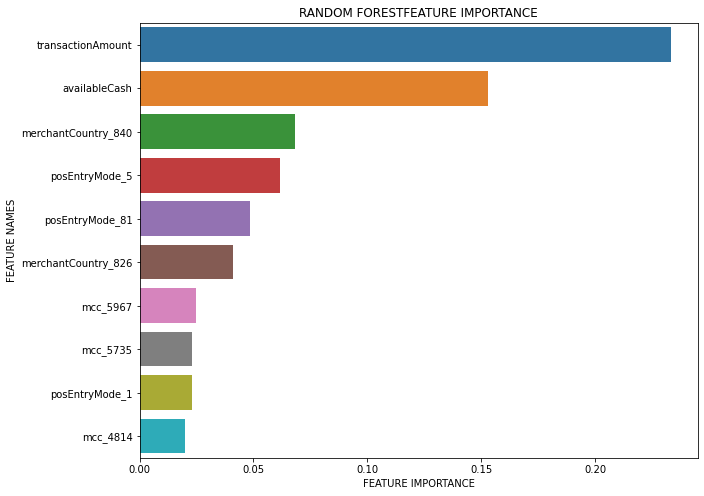

In [60]:
plot_feature_importance(
    rf.feature_importances_,
    X_train.columns,
    'RANDOM FOREST')

In [ ]:
#SVM with NON LINEAR KERNELRS (RBF kernel)*************************************

#svm_rbf = svm.SVC(kernel='rbf',class_weight = {1:15})
#svm_rbf.fit(X_train, y_train)
#yhat_rbf = svm_rbf.predict(X_test)
#print('SVM \n',
 #     'Precision = ', precision_score(y_test, yhat_rbf), '\n',
  #    'Recall = ', recall_score(y_test, yhat_rbf), '\n')
#******************************************************************************


In [ ]:


#ADABOOST *******************************************************************
ada = ensemble.AdaBoostClassifier()
ada.fit(X_train,y_train)
yhat_ada = ada.predict(X_test)

print('AdaBoost \n',
      'Precision = ', precision_score(y_test, yhat_ada), '\n',
      'Recall = ', recall_score(y_test, yhat_ada), '\n')
#******************************************************************************



## Models with new features and weight class

In [ ]:
"""
Introduction of new features:
Adding amountMinusAvrg
Adding avrgSpentWeekday

"""


In [61]:
# amountMinusAvrg contains for each account the amount spent
# minus the avreage of the spent amount per account
dict_avrg_amount = trans.groupby('accountNumber')['transactionAmount'].mean().to_frame().to_dict()['transactionAmount']
trans['amountMinusAvrg'] = trans.apply(lambda x: dict_avrg_amount[x['accountNumber']] - x['transactionAmount'] , axis=1)

In [62]:
#avrgSpentWeekday
trans['transWeekDay'] = trans.transactionTime.apply(lambda x: "Day_%d"%pd.Timestamp.to_pydatetime(x).weekday())
avrgSpentWeekday = trans.groupby(['accountNumber', 'transWeekDay'])['transactionAmount'].mean()
dict_avrgSpentWeekday = avrgSpentWeekday.to_dict()


In [63]:
trans['amountMinusAvrgSpentWeekday'] =  trans.apply(
    lambda x: x['transactionAmount'] - dict_avrgSpentWeekday[tuple((x['accountNumber'], x['transWeekDay']))]  ,
    axis=1)

In [64]:
set_fraud_ids = set(fraud_fear.eventId)
trans['Fraud'] = [ (x in set_fraud_ids) for x in trans.index]
#trans.eventId.apply(lambda x: 1 if x in set_fraud_ids else 0)

trans['transactionTime'] = pd.to_datetime(trans['transactionTime'])
trans['Date'] = trans['transactionTime'].apply(lambda x: datetime.strftime(x, '%d-%m-%Y') )
trans['Time'] = trans['transactionTime'].apply(lambda x: datetime.strftime(x, '%H:%M') )

trans['hours'] = trans['transactionTime'].apply(lambda x: datetime.strftime(x, "H_%H"))


In [65]:
cat_predictors = ['mcc', 'merchantCountry', 'posEntryMode','hours']
num_predictors = ['availableCash','amountMinusAvrg','amountMinusAvrgSpentWeekday']
#num_predictors = ['amountMinusAvrg','amountMinusAvrgSpentWeekday']

data_pred = compile_dataset(trans, cat_predictors, num_predictors)


In [ ]:
#Split

In [66]:
# x_nor is containing the normalized values of num_predictors, this is only used for LR
Feature_cat = trans[cat_predictors]
Feature_num = trans[num_predictors]
X_nor = preprocessing.StandardScaler().fit(Feature_num).transform(Feature_num)

X_nor = pd.DataFrame(X_nor, columns=num_predictors, index = trans.index)
#Get dummies 
X_nor = pd.concat([X_nor,pd.get_dummies(trans['posEntryMode'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['mcc'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['merchantCountry'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['hours'])], axis=1)


In [67]:
y = trans['Fraud']


eventId
18688431A1    False
2164986A1     False
Name: Fraud, dtype: bool

In [ ]:
y.shape

In [ ]:
X_nor.shape


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_nor, y, test_size = 0.3)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
"""
MODELS
"""


In [69]:
#Logistic Regression***********************************************************
#"Baseline" model <=> reference
#class weight 1:10  Precision =  0.15 | Recall =  0.27
#class weight 1:20  Precision =  0.09 | Recall =  0.38

lr = LogisticRegression(class_weight = {0:1,
                                        1:40})
#class_weight better than undersampling cause it keeps ALL the given data
lr.fit(X_train, y_train)

y_hat_lr = lr.predict(X_test)
print('Logistic Regression \n',
      'Precision = ', precision_score(y_test, y_hat_lr), '\n',
      'Recall = ', recall_score(y_test, y_hat_lr), '\n')
#******************************************************************************


/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be ra

Logistic Regression 
 Precision =  0.06635802469135803 
 Recall =  0.671875 



In [ ]:
X= data_pred 
y = trans['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
#Random Forest***********************************************************
#balanced: Random Forest  Precision =  0.61| Recall =  0.38
#class weight 1:10  Precision =  0.57 | Recall =  0.42
#class weight 1:20 Precision = 0.47 | Recall = 0.43
#class weight 1:30 Precision = 0.47 | Recall = 0.39
rf = RandomForestClassifier(class_weight = {0:1,
                                            1:40})
rf.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)
print('Random Forest \n',
      'Precision = ', precision_score(y_test, y_hat_rf), '\n',
      'Recall = ', recall_score(y_test, y_hat_rf), '\n')

feat_import = pd.DataFrame({'feature':rf.feature_names_in_,
                            'coef':rf.feature_importances_})
#******************************************************************************


In [ ]:

plot_feature_importance(
    rf.feature_importances_,
    X_train.columns,
    'RANDOM FOREST')

In [ ]:
predict_prob = rf.predict_proba(X_test)
y_predict_prob =  pd.Series([x[1] for x in predict_prob], index=X_test.index)

for thresh in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:
    y_predict =  y_predict_prob > thresh

    true_positives = len(
        set(y_test[y_test == 1].index).intersection(set(y_predict[y_predict == 1 ].index))
    )

    true_negatives = len(
        set(y_test[y_test == 0].index).intersection(set(y_predict[y_predict == 0 ].index))
    )

    false_positives = len(
        set(y_test[y_test == 0].index).intersection(set(y_predict[y_predict == 1 ].index))
    )

    false_negatives = len(
        set(y_test[y_test == 1].index).intersection(set(y_predict[y_predict == 0 ].index))
    )

    precision =  round(100*true_positives / (true_positives + false_positives), 0) 
    recall    =  round(100*true_positives / (true_positives + false_negatives), 0)

    print(f'{thresh} {true_positives} {false_positives} {true_negatives}  {false_negatives} {precision} {recall}')

In [ ]:
y_predict_prob.sort_values(ascending=False, inplace=True)

In [ ]:
y_predict_prob[:400].index

In [ ]:
#SVM with NON LINEAR KERNELRS (RBF kernel)*************************************

svm_rbf = svm.SVC(kernel='rbf',class_weight = {1:10})
svm_rbf.fit(X_train, y_train)
yhat_rbf = svm_rbf.predict(X_test)
print('SVM \n',
      'Precision = ', precision_score(y_test, yhat_rbf), '\n',
      'Recall = ', recall_score(y_test, yhat_rbf), '\n')
#******************************************************************************


In [ ]:
#ADABOOST *********************************************************************

ada = ensemble.AdaBoostClassifier()
ada.fit(X_train,y_train)
yhat_ada = ada.predict(X_test)
print('AdaBoost \n',
      'Precision = ', precision_score(y_test, yhat_ada), '\n',
      'Recall = ', recall_score(y_test, yhat_ada), '\n')
#******************************************************************************


In [ ]:
#rf_model = RandomForestClassifier(n_estimators=100)


## Applying the undersampling technique


This will make the training set small, but with enough data to generate a good classifier.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler




In [ ]:
cat_predictors = ['mcc', 'merchantCountry', 'posEntryMode','hours']
num_predictors = ['transactionAmount', 'availableCash','amountMinusAvrg','amountMinusAvrgSpentWeekday']
data_pred = compile_dataset(trans, cat_predictors, num_predictors)


In [ ]:
# x_nor is containing the normalized values of num_predictors, this is only used for LR
Feature_cat = trans[cat_predictors]
Feature_num = trans[num_predictors]
X_nor = preprocessing.StandardScaler().fit(Feature_num).transform(Feature_num)

X_nor = pd.DataFrame(X_nor, columns=num_predictors, index = trans.index)
#Get dummies 
X_nor = pd.concat([X_nor,pd.get_dummies(trans['posEntryMode'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['mcc'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['merchantCountry'])], axis=1)
X_nor = pd.concat([X_nor,pd.get_dummies(trans['hours'])], axis=1)


In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X_nor, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under sampling classes distribution")



In [ ]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split( X_res, y_res, test_size=0.2, random_state=4)


In [ ]:
#Logistic Regression *********************************************************

lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_res_train,y_res_train)
yhat_lr_res = lr.predict(X_res_test)
yhat_lr_prob = lr.predict_proba(X_res_test)
print('Logistic Regression \n',
      'Precision = ', precision_score(y_test, y_hat_lr), '\n',
      'Recall = ', recall_score(y_test, y_hat_lr), '\n')
#******************************************************************************


In [ ]:
# Undersampling without using normalized X
X= data_pred 
y = trans['Fraud']
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')


In [ ]:
#Random Forest***********************************************************
#balanced: Random Forest  Precision =  0.61| Recall =  0.38

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)
print('Random Forest \n',
      'Precision = ', precision_score(y_test, y_hat_rf), '\n',
      'Recall = ', recall_score(y_test, y_hat_rf), '\n')

feat_import = pd.DataFrame({'feature':rf.feature_names_in_,
                            'coef':rf.feature_importances_})
#******************************************************************************
plot_feature_importance(
    rf.feature_importances_,
    X_train.columns,
    'RANDOM FOREST')

In [ ]:
#SVM with NON LINEAR KERNELRS (RBF kernel)*************************************

svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
yhat_rbf = svm_rbf.predict(X_test)
print('SVM \n',
      'Precision = ', precision_score(y_test, yhat_rbf), '\n',
      'Recall = ', recall_score(y_test, yhat_rbf), '\n')
#******************************************************************************



In [ ]:
#ADABOOST *********************************************************************

ada = ensemble.AdaBoostClassifier()
ada.fit(X_train,y_train)
yhat_ada = ada.predict(X_test)
print('AdaBoost \n',
      'Precision = ', precision_score(y_test, yhat_ada), '\n',
      'Recall = ', recall_score(y_test, yhat_ada), '\n')
#******************************************************************************


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


def compile_dataset(data, cat_predictors, num_predictors):
    data_formatted = pd.DataFrame()
    for c in cat_predictors:
        data_formatted = pd.concat([data_formatted, pd.get_dummies(data[c], prefix=c)], axis=1)

    for n in num_predictors:
        data_formatted = pd.concat([data_formatted, data[n]], axis=1)

    return data_formatted


data_path = os.path.join('FeaturesSpace Homework', 'data', )
fraud_fear = pd.read_csv(os.path.join(data_path, 'labels_obf.csv'))

data = pd.read_csv("///Users/hocine/Desktop/feature_space/data-new/transactions_obf.csv")

# data = pd.read_csv(os.path.join(data_path, 'transactions_obf.csv'))

data[['transactionAmount', 'availableCash']] = StandardScaler().fit_transform(
    data[['transactionAmount', 'availableCash']])

set_fraud_ids = set(fraud_fear.eventId)

data['Fraud'] = data.eventId.apply(lambda x: 1 if x in set_fraud_ids else 0)
data['transactionTime'] = pd.to_datetime(data['transactionTime'])

merchantids = pd.unique(data['merchantId'])
mccs = pd.unique(data['mcc'])
merchantCountries = pd.unique(data['merchantCountry'])
merchantZips = pd.unique(data['merchantZip'])

posEntryMode = pd.unique(data['posEntryMode'])

columns = ['transactionTime', 'eventId', 'accountNumber', 'merchantId', 'mcc',
           'merchantCountry', 'merchantZip', 'posEntryMode', 'transactionAmount',
           'availableCash']

cat_predictors = ['mcc', 'merchantCountry', 'posEntryMode']
num_predictors = ['transactionAmount', 'availableCash']

data_pred = compile_dataset(data, cat_predictors, num_predictors)

X_train, X_test, y_train, y_test = train_test_split(data_pred, data['Fraud'].tolist(), test_size=0.3)

"""
MODELS
"""
# Logistic Regression***********************************************************
# "Baseline" model <=> reference
lr = LogisticRegression(class_weight={0: 1,
                                      1: 99})
# class_weight better than under-sampling cause it keeps ALL the given data
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)
print('Logistic Regression \n',
      'Precision = ', precision_score(y_test, y_hat), '\n',
      'Recall = ', recall_score(y_test, y_hat), '\n')
# ******************************************************************************

# Random Forest
# balanced: Random Forest  Precision =  0.61| Recall =  0.38
# class weight 1:10  Precision =  0.57 | Recall =  0.42
# class weight 1:20 Precision = 0.47 | Recall = 0.43
# class weight 1:30 Precision = 0.46 | Recall = 0.42
rf = RandomForestClassifier(class_weight={0: 1,
                                          1: 30})
rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
print('Random Forest \n',
      'Precision = ', precision_score(y_test, y_hat), '\n',
      'Recall = ', recall_score(y_test, y_hat), '\n')

feat_import = pd.DataFrame({'feature': rf.feature_names_in_,
                            'coef': rf.feature_importances_})
# Classes seem to be unseperable (completely). In Other words, there is BIG overlapping between Fraudulent
# and non fraudulent (see plots of transactions per account number)
# One solution would be to predict according to specefic account Number (RNN for example...)


# SVM with NON LINEAR KERNELRS (RBF kernel)
# Adaboost
